In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
import requests as req

In [84]:
import folium

In [3]:
restnyc=pd.read_json('DPR_Eateries_001.json')
restnyc.shape

(237, 10)

In [4]:
restnyc.head(10)

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name
0,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2019-06-15,2023-12-31,None,M10-72-1A-C,None,None,Food Cart
1,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2015-09-12,2019-12-31,None,M10-72-3-C,None,None,Food Cart
2,Central Park Food Cart,East Drive and 72 Street,M010,2018-04-26,2022-12-31,None,M10-72-ED-C,None,None,Food Cart
3,Central Park Food Cart,"West Drive, between West 74 and West 75 streets",M010,2015-04-30,2019-12-31,None,M10-74-WD-C,None,None,Food Cart
4,Central Park Food Cart,"East of West Drive, West 81 Street path to Del...",M010,2018-04-27,2022-12-31,None,M10-81-WD-C,None,None,Food Cart
5,Central Park Food Cart,"East 84 Street, pedestrian path, west side of ...",M010,2015-07-29,2019-12-31,None,M10-84-ED-C,None,None,Food Cart
6,Central Park Food Cart,Northwest corner of Heckscher ballfields,M010,2018-06-11,2022-12-31,None,M10-W65-C,None,None,Food Cart
7,Central Park Food Cart,East side of West Drive at West 96 Street,M010,2019-03-13,2023-12-31,None,M10-W67-C,None,None,Food Cart
8,Battery Park Food Cart,8 Various Locations,M005,2016-09-01,2020-12-31,None,M5-C,None,None,Food Cart
9,Frank O'connor Park Food Cart,"Broadway, between 78th Street and 79th Street",Q098,2009-05-08,2013-12-31,None,Q98-C,None,None,Food Cart


In [9]:
url='https://api.cityofnewyork.us/geoclient/v1/address.json?houseNumber=314&street=west%20100%20st&borough=manhattan&app_id=7e2f0b70&app_key=0f3c3bc243a3f7cbf1b28e9ade802130'

In [6]:
urlProperties='https://geosearch.planninglabs.nyc/v1/autocomplete?text=manhattan'

In [6]:
resp=req.get('https://api.cityofnewyork.us/geoclient/v1/search.json?input=314%20west%20100%20st%20manhattan&app_id=7e2f0b70&app_key=0f3c3bc243a3f7cbf1b28e9ade802130')

data=pd.DataFrame(resp.json())

data.head()

,id,status,input,results,parseTree,policy
0,ip-10-119-99-116-5143291-1587322039269,OK,314 west 100 st manhattan,"{'level': '0', 'status': 'EXACT_MATCH', 'reque...",None,None


In [7]:
from pandas.io.json import json_normalize

flat_json=json_normalize(resp.json())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
restnyc['type_name'].unique()

array(['Food Cart', 'Mobile Food Truck', 'Restaurant', 'Snack Bar',
       'Specialty Cart', 'Fruit & Vegetable Cart'], dtype=object)

In [9]:
restmanh=restnyc[(restnyc['type_name']=='Restaurant')|(restnyc['type_name']=='Mobile Food Truck')].copy()
restmanh.head(10)

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name
79,Seth Low Park Mobile Food Truck,Between Bay Parkway & Avenue P,B100,2018-06-22,2022-12-31,None,B100-MT,None,None,Mobile Food Truck
80,J.J. Byrne Memorial Park Mobile Food Truck,"4th Avenue to 5th Avenue, between 3rd Street &...",B111,2016-07-30,2020-12-31,None,B111-MT,None,None,Mobile Food Truck
81,Red Hook Recreation Center Mobile Food Truck,Bay Street between Henry & Clinton streets,B126,2014-07-01,2022-12-31,None,B126-3MT,None,None,Mobile Food Truck
82,Colonel Markus Playground Mobile Food Truck,5th Street entrance off of Avenue and Ocean Park,B128,2017-01-01,2020-12-31,None,B128-MT,None,None,Mobile Food Truck
83,G. Garibaldo Playground Trucks,18th Avenue and 82nd Street,B158,2018-03-09,2020-12-31,None,B158-MT,None,None,Mobile Food Truck
84,Brooklyn Queens Expressway Mobile Food Truck,corner of Columbia Terrace & Montague Street,B222,2016-08-02,2025-12-31,None,B222-MT,None,None,Mobile Food Truck
85,William E. Kelly Park Mobile Food Truck,Avenue S between East 14th & East 16th streets,B051,2016-01-01,2019-12-31,None,B51-MT,None,None,Mobile Food Truck
86,Jackie Robinson Park Mobile Food Truck,Bradhurst Avenue between West 145 & West 155 s...,B294,2018-03-28,2022-12-31,None,M14-MT,None,None,Mobile Food Truck
87,Anibal Aviles Playground Mobile Food Truck,West 107 to West 108 street and Amsterdam to C...,M200,2018-03-12,2022-12-31,This mobile food unit is also authorized to op...,M200-200A/200/229-MT,None,None,Mobile Food Truck
88,Highbridge Park Mobile Food Truck,Amsterdam Avenue and West 173 Street,M037,2015-12-04,2019-12-31,None,M37-3MT,None,None,Mobile Food Truck


In [10]:
#Park id con M- Manhattan. 
restmanh=restmanh[(restmanh['park_id'].str.startswith('B'))|(restmanh['park_id'].str.startswith('M'))]
restmanh=restmanh[['name','location','description']]


In [11]:
restmanh.head()

,name,location,description
79,Seth Low Park Mobile Food Truck,Between Bay Parkway & Avenue P,None
80,J.J. Byrne Memorial Park Mobile Food Truck,"4th Avenue to 5th Avenue, between 3rd Street &...",None
81,Red Hook Recreation Center Mobile Food Truck,Bay Street between Henry & Clinton streets,None
82,Colonel Markus Playground Mobile Food Truck,5th Street entrance off of Avenue and Ocean Park,None
83,G. Garibaldo Playground Trucks,18th Avenue and 82nd Street,None


In [2]:
rentas=pd.read_csv('DOF__Cooperative_Comparable_Rental_Income___Manhattan__FY_2008_2009.csv')

In [3]:
rentas.head()

,MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Boro-Block-Lot,MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,...,COMPARABLE RENTAL – 2 –Neighborhood,COMPARABLE RENTAL – 2 –Building Classification,COMPARABLE RENTAL – 2 –Total Units,COMPARABLE RENTAL – 2 –Year Built,COMPARABLE RENTAL – 2 –Gross SqFt,COMPARABLE RENTAL – 2 –Est. Gross Income,COMPARABLE RENTAL – 2 –Gross Income per SqFt,COMPARABLE RENTAL – 2 –Full Market Value,COMPARABLE RENTAL – 2 –Market Value per SqFt,COMPARABLE RENTAL – 2 –Dist. from Coop in miles
0,1-01535-0005,"203 89 STREET\nManhattan, NY\n(40.749883999647...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,UPPER EAST SIDE (79-96),C4-WALK-UP,20.0,1910.0,9820.0,319000.0,32.50,1550000.0,158.0,0.25
1,1-02090-0019,"619 143 STREET\nManhattan, NY\n(40.74988399964...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HARLEM-UPPER,C4-WALK-UP,16.0,1926.0,15165.0,123887.0,8.17,380000.0,25.1,0.50
2,1-00442-0021,"49 1 STREET\nManhattan, NY\n(40.749883999647, ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EAST VILLAGE,C1-WALK-UP,20.0,1900.0,9135.0,187500.0,20.53,838000.0,92.0,0.60
3,1-01238-0010,"255 90 STREET\nManhattan, NY\n(40.749883999647...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,UPPER WEST SIDE (79-96),D3-ELEVATOR,66.0,1929.0,96546.0,2114068.0,21.90,9450000.0,98.0,0.35
4,1-01413-0027,"167 78 STREET\nManhattan, NY\n(40.749883999647...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,UPPER EAST SIDE (59-79),D6-ELEVATOR,48.0,1936.0,52356.0,2164781.0,41.30,10900000.0,208.0,0.20


In [5]:
rentas=rentas.dropna(subset=['Latitude', 'Longitude'])
rentas.head()

,MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Boro-Block-Lot,MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,...,COMPARABLE RENTAL – 2 –Neighborhood,COMPARABLE RENTAL – 2 –Building Classification,COMPARABLE RENTAL – 2 –Total Units,COMPARABLE RENTAL – 2 –Year Built,COMPARABLE RENTAL – 2 –Gross SqFt,COMPARABLE RENTAL – 2 –Est. Gross Income,COMPARABLE RENTAL – 2 –Gross Income per SqFt,COMPARABLE RENTAL – 2 –Full Market Value,COMPARABLE RENTAL – 2 –Market Value per SqFt,COMPARABLE RENTAL – 2 –Dist. from Coop in miles
8,1-01374-0001,"781 5 AVENUE\nManhattan, NY\n(40.749883999647,...",1,10022.0,40.764454,-73.972871,8.0,4.0,11401.0,1040751.0,...,UPPER EAST SIDE (59-79),D6-ELEVATOR,309.0,1927.0,316500.0,13938201.0,44.00,70100000.0,221.0,0.65
9,1-01204-0001,"621 COLUMBUS AVENUE\nManhattan, NY\n(40.749883...",1,10024.0,40.789189,-73.970189,7.0,6.0,177.0,1031595.0,...,HARLEM-CENTRAL,D1-ELEVATOR,134.0,1970.0,129386.0,1173531.0,9.07,3310000.0,25.6,2.65
10,1-01993-0023,"3117 BROADWAY\nManhattan, NY\n(40.749883999647...",1,10027.0,40.812961,-73.960287,9.0,7.0,211.0,1059839.0,...,MORNINGSIDE HEIGHTS,D3-ELEVATOR,39.0,1910.0,67518.0,1228538.0,18.20,5000000.0,74.0,0.30
13,1-01995-0001,"550 RIVERSIDE DRIVE\nManhattan, NY\n(40.749883...",1,10027.0,40.815961,-73.960318,9.0,7.0,211.0,1059880.0,...,MORNINGSIDE HEIGHTS,D3-ELEVATOR,47.0,1911.0,47327.0,692211.0,14.63,2740000.0,58.0,0.55
19,1-01241-0052,"2511 BROADWAY\nManhattan, NY\n(40.749883999647...",1,10025.0,40.793084,-73.972939,7.0,6.0,179.0,1033653.0,...,UPPER WEST SIDE (79-96),D6-ELEVATOR,218.0,1920.0,665741.0,17605074.0,26.40,85300000.0,128.0,0.35


In [21]:
precios=rentas[['COMPARABLE RENTAL – 2 –Neighborhood','COMPARABLE RENTAL – 2 –Market Value per SqFt']].copy()
precios.groupby(precios['COMPARABLE RENTAL – 2 –Neighborhood'])
aux=precios.head(20)
aux

,COMPARABLE RENTAL – 2 –Neighborhood,COMPARABLE RENTAL – 2 –Market Value per SqFt
8,UPPER EAST SIDE (59-79),221.0
9,HARLEM-CENTRAL,25.6
10,MORNINGSIDE HEIGHTS,74.0
13,MORNINGSIDE HEIGHTS,58.0
19,UPPER WEST SIDE (79-96),128.0
20,MIDTOWN WEST,220.0
23,GREENWICH VILLAGE-CENTRAL,161.0
24,WASHINGTON HEIGHTS LOWER,54.0
25,UPPER EAST SIDE (79-96),139.0
35,UPPER WEST SIDE (79-96),108.0


In [6]:
rentas[['COMPARABLE RENTAL – 2 –Market Value per SqFt']].min()

COMPARABLE RENTAL – 2 –Market Value per SqFt    19.5
dtype: float64

In [7]:
rentas[['COMPARABLE RENTAL – 2 –Market Value per SqFt']].max()

COMPARABLE RENTAL – 2 –Market Value per SqFt    537.0
dtype: float64

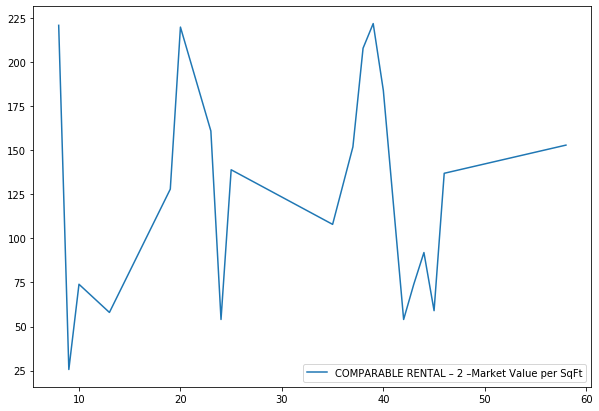

In [28]:
aux.plot.line(figsize=(10,7))
#aux.plot.line(x='COMPARABLE RENTAL – 2 –Neighborhood', y='COMPARABLE RENTAL – 2 –Market Value per SqFt');

In [30]:
def geopuntos(data):
    principal=None
    
    principal={
            'type':'Point',
            'coordinates':[data['Longitude'],
                           data['Latitude']]
        }
        
    return {'name': data['MANHATTAN – COOPERATIVES COMPARABLE PROPERTIES – Address'],
            'lat': data['Latitude'],
            'lng': data['Longitude'],
            'principal': principal,
            'precios':data['COMPARABLE RENTAL – 2 –Neighborhood']}

In [31]:

resultado=rentas.apply(geopuntos, result_type='expand', axis=1)

In [32]:
resultado.head()

,name,lat,lng,principal,precios
8,"781 5 AVENUE\nManhattan, NY\n(40.749883999647,...",40.764454,-73.972871,"{'type': 'Point', 'coordinates': [-73.972871, ...",UPPER EAST SIDE (59-79)
9,"621 COLUMBUS AVENUE\nManhattan, NY\n(40.749883...",40.789189,-73.970189,"{'type': 'Point', 'coordinates': [-73.970189, ...",HARLEM-CENTRAL
10,"3117 BROADWAY\nManhattan, NY\n(40.749883999647...",40.812961,-73.960287,"{'type': 'Point', 'coordinates': [-73.960287, ...",MORNINGSIDE HEIGHTS
13,"550 RIVERSIDE DRIVE\nManhattan, NY\n(40.749883...",40.815961,-73.960318,"{'type': 'Point', 'coordinates': [-73.960318, ...",MORNINGSIDE HEIGHTS
19,"2511 BROADWAY\nManhattan, NY\n(40.749883999647...",40.793084,-73.972939,"{'type': 'Point', 'coordinates': [-73.972939, ...",UPPER WEST SIDE (79-96)


In [33]:
resultado.to_csv('baseauxiliar.csv')

In [28]:
from pymongo import MongoClient
import pymongo

In [29]:
cliente=pymongo.MongoClient()  
db=cliente.nueva_db 
colec=db.n_coleccion

In [31]:
resultado.to_json('rentas.json') 
colec.insert_many(resultado.to_dict('records')) 

In [32]:
colec.create_index([('principal', '2dsphere')])

'principal_2dsphere'

In [34]:
def encuentra(geopoint, radio=500):
    
    return colec.find({'principal':{
        '$near': {'$geometry': geopoint, '$maxDistance':radio}
    }})

In [37]:
gramercy_park={'type': 'Point', 'coordinates':[-73.986022,40.737877]}  # geopoint

radio=100  # radio de busqueda

total=encuentra(gramercy_park, radio).count()

total

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


11

In [39]:
ofi_near=pd.DataFrame(encuentra(gramercy_park, radio))
ofi_near=ofi_near.drop('_id',axis=1)
ofi_near.head()

,name,lat,lng,principal
0,"24 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.737445,-73.985674,"{'type': 'Point', 'coordinates': [-73.985674, ..."
1,"1 LEXINGTON AVENUE\nManhattan, NY\n(40.7498839...",40.738307,-73.985598,"{'type': 'Point', 'coordinates': [-73.985598, ..."
2,"26 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.737371,-73.985505,"{'type': 'Point', 'coordinates': [-73.985505, ..."
3,"60 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.738497,-73.986309,"{'type': 'Point', 'coordinates': [-73.98630899..."
4,"4 LEXINGTON AVENUE\nManhattan, NY\n(40.7498839...",40.738461,-73.985515,"{'type': 'Point', 'coordinates': [-73.985515, ..."


In [70]:
ofi_near=pd.DataFrame(encuentra(gramercy_park, radio))
ofi_near=ofi_near.drop('_id',axis=1)
ofi_near.head()

,name,lat,lng,principal
0,"24 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.737445,-73.985674,"{'type': 'Point', 'coordinates': [-73.985674, ..."
1,"1 LEXINGTON AVENUE\nManhattan, NY\n(40.7498839...",40.738307,-73.985598,"{'type': 'Point', 'coordinates': [-73.985598, ..."
2,"26 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.737371,-73.985505,"{'type': 'Point', 'coordinates': [-73.985505, ..."
3,"60 GRAMERCY PARK\nManhattan, NY\n(40.749883999...",40.738497,-73.986309,"{'type': 'Point', 'coordinates': [-73.98630899..."


In [73]:
address=[]
for e in ofi_near.name:
    aux=e.split('Manhattan')[0]
    aux=aux.replace('\n','')
    address.append(aux)
ofi_near.name=address
ofi_near.head()

,name,lat,lng,principal
0,24 GRAMERCY PARK,40.737445,-73.985674,"{'type': 'Point', 'coordinates': [-73.985674, ..."
1,1 LEXINGTON AVENUE,40.738307,-73.985598,"{'type': 'Point', 'coordinates': [-73.985598, ..."
2,26 GRAMERCY PARK,40.737371,-73.985505,"{'type': 'Point', 'coordinates': [-73.985505, ..."
3,60 GRAMERCY PARK,40.738497,-73.986309,"{'type': 'Point', 'coordinates': [-73.98630899..."


In [77]:
subway={'type': 'Point', 'coordinates':[-73.986463,40.740095]} 
radio=250
metro_num=encuentra(subway, radio).count()
metro_num

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


5

In [99]:
metro_num=encuentra(subway, radio)
metro=pd.DataFrame(metro_num)
metro=metro.drop('_id',axis=1)

address=[]
for e in metro.name:
    aux=e.split('Manhattan')[0]
    aux=aux.replace('\n','')
    address.append(aux)
metro.name=address
metro

,name,lat,lng,principal
0,60 GRAMERCY PARK,40.738497,-73.986309,"{'type': 'Point', 'coordinates': [-73.98630899..."
1,50 LEXINGTON AVENUE,40.740440,-73.984302,"{'type': 'Point', 'coordinates': [-73.984302, ..."
2,7 LEXINGTON AVENUE,40.738634,-73.985367,"{'type': 'Point', 'coordinates': [-73.98536700..."
3,4 LEXINGTON AVENUE,40.738461,-73.985515,"{'type': 'Point', 'coordinates': [-73.985515, ..."
4,1 LEXINGTON AVENUE,40.738307,-73.985598,"{'type': 'Point', 'coordinates': [-73.985598, ..."


In [100]:
m = folium.Map(
    location=[40.737877,-73.986022],
    zoom_start=11,
    tiles='Stamen Terrain'
)

tooltip = 'Click para info'

folium.Marker([40.738497, -73.986309], popup='<i>60 GRAMERCY PARK</i>', tooltip=tooltip).add_to(m)
folium.Marker([40.740095, -73.986463], popup='<b>Subway</b>',icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
folium.Marker([40.706363, -73.996919], popup='<b>Brooklyn bridge</b>',icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

folium.CircleMarker(
    location=[40.737877,-73.986022],
    radius=50,
    popup='Gramercy Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)

In [101]:
m